In [5]:
!pip3 install wordcloud

You should consider upgrading via the 'C:\Users\User\anaconda3\python.exe -m pip install --upgrade pip' command.


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import string
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")

import warnings
warnings.filterwarnings("ignore")

UsageError: Line magic function `%` not found.


In [8]:
tiktok_samples = pd.read_csv('/Users/User/Kaggle Datasets/tiktok_google_play_reviews/tiktok_google_play_reviews.csv')
print(tiktok_samples.head())

                                            reviewId        userName  \
0  gp:AOqpTOHRz-11c0apHLSKHHp52FxUXsQS9Z88wP3sWc5...    MR LOL GAMER   
1  gp:AOqpTOF6mFDEkIypmyT3shDLjPHg8zB3kdns2W36ahp...     Dino Kljako   
2  gp:AOqpTOGtqU4sb8vuVo3-eB7kIXWoBn-0YCUZ1SnPRKS...  Olivia Harding   
3  gp:AOqpTOFHDm-Qa5R6jCpOGTFT2qr1_PKbCTbBNPahCEn...         Keli We   
4  gp:AOqpTOFB6Ndao8IHRpOJRmbSknwMGxHcwYzux93YyXI...    Mavis Kotoka   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/AATXAJ...   
1  https://play-lh.googleusercontent.com/a-/AOh14...   
2  https://play-lh.googleusercontent.com/a/AATXAJ...   
3  https://play-lh.googleusercontent.com/a-/AOh14...   
4  https://play-lh.googleusercontent.com/a/AATXAJ...   

                                             content  score  thumbsUpCount  \
0                                               Good      5              0   
1  Awesome app! Too many people on it where it's ...      5              0

terdapat banyak data yang NaN dalam kolom. Untuk bisa menganalisa data sentimen dari Tiktok, dibutuhkan data kolom content dan score.

In [25]:
tiktok_samples = tiktok_samples[['content', 'score']]
print(tiktok_two_samples.head())

                                             content  score
0                                               Good      5
1  Awesome app! Too many people on it where it's ...      5
2                                            Not bad      5
3                                         It is good      2
4                               Very interesting app      5


In [26]:
print(tiktok_samples.isnull().sum())

content    4
score      0
dtype: int64


In [27]:
tiktok_samples.dropna()

,content,score
0,Good,5
1,Awesome app! Too many people on it where it's ...,5
2,Not bad,5
3,It is good,2
4,Very interesting app,5
...,...,...
307052,"Best app ever let's do it ,very awesome let ev...",5
307053,I LOVE TIKTOK,5
307054,The videos are amazing...such an amazing app,5
307055,Nice app,5


In [31]:
stopword=set(STOPWORDS)
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
tiktok_samples["content"] = tiktok_samples["content"].apply(clean)

In [32]:
ratings = tiktok_samples['score'].value_counts()
numbers = ratings.index
quantity = ratings.values
import plotly.express as px
figure = px.pie(tiktok_two_samples, 
             values=quantity, 
             names=numbers, hole = 0.5,)
figure.show()

sebanyak 75.5% para pengguna memberikan rating 5 di playstore, dan sebanyak 12.1% pengguna yang memberikan rating 1 di playstore.

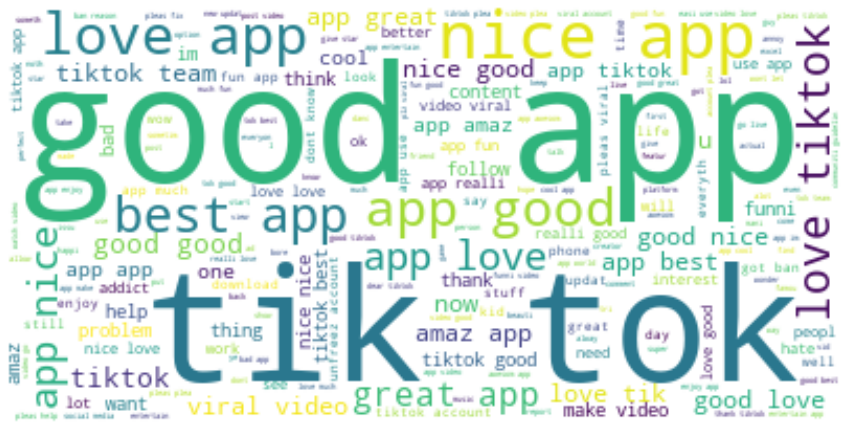

In [35]:
# Start with one review:
stopwords = set(STOPWORDS)
text = " ".join(i for i in tiktok_samples.content)

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

inilah beberapa kata review paling banyak dari pengguna Tiktok, "good app" dan "tiktok" menjadi kata yang paling banyak digunakan oleh review dilihat dari besarnya kata.

In [36]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
tiktok_samples["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in tiktok_samples["content"]]
tiktok_samples["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in tiktok_samples["content"]]
tiktok_samples["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in tiktok_samples["content"]]
tiktok_samples = tiktok_samples[["content", "Positive", "Negative", "Neutral"]]
print(tiktok_samples.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...


                                             content  Positive  Negative  \
0                                               good      1.00       0.0   
1  awesom app mani peopl easier fb girl awesom gu...      0.29       0.0   
2                                                bad      0.00       1.0   
3                                               good      1.00       0.0   
4                                       interest app      0.75       0.0   

   Neutral  
0     0.00  
1     0.71  
2     0.00  
3     0.00  
4     0.25  


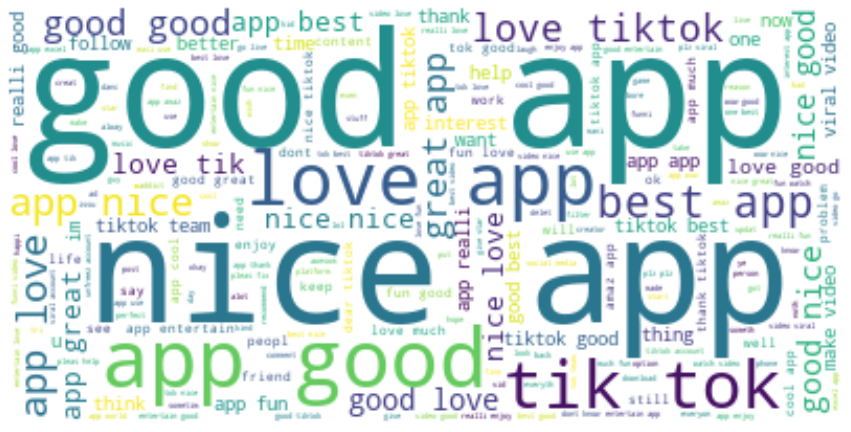

In [37]:
# respon positif
positive =' '.join([i for i in tiktok_samples['content'][tiktok_samples['Positive'] > tiktok_samples["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

inilah kata review Tiktok yang paling banyak digunakan untuk menunjukkan respon positif pengguna terhadap aplikasi.

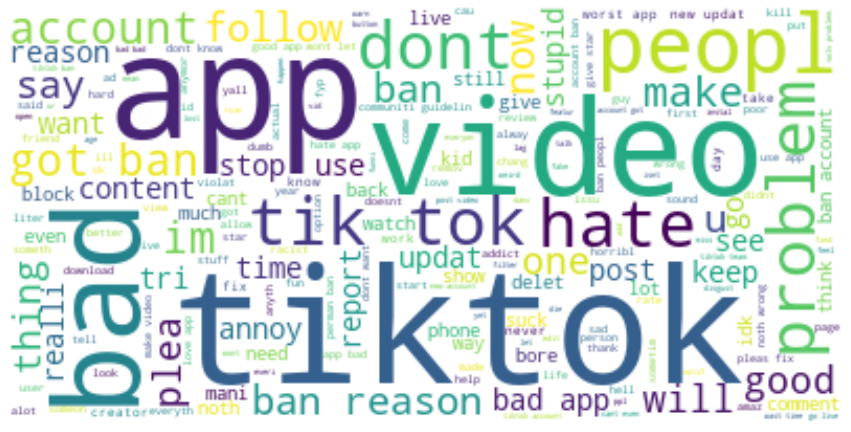

In [38]:
# respon negatif
negative =' '.join([i for i in tiktok_samples['content'][tiktok_samples['Negative'] > tiktok_samples["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

inilah kata review Tiktok yang paling banyak digunakan untuk menunjukkan respon negatif pengguna terhadap aplikasi.

# Summary #
 berdasarkan analisis di atas, Tiktok merupakan platform media sosial yang menampilkan konten video pendek yang saat ini diganderungi oleh masyarakat. orang-orang dengan mudah menemukan konten entertain yang menyenangkan dan menghibur, namun tidak sedikit juga konten yang berbau negatif. 